✓ Created output directories: visualizations/ and models/

TITANIC SURVIVAL PREDICTION - COMPLETE ANALYSIS

[STEP 1] LOADING DATASET
----------------------------------------------------------------------
Dataset downloaded to: C:\Users\l\.cache\kagglehub\datasets\tedllh\titanic-train\versions\1
✓ Loaded: titanic_train.csv
✓ Dataset shape: 891 rows × 12 columns

[STEP 2] EXPLORATORY DATA ANALYSIS
----------------------------------------------------------------------

📊 First 10 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, M

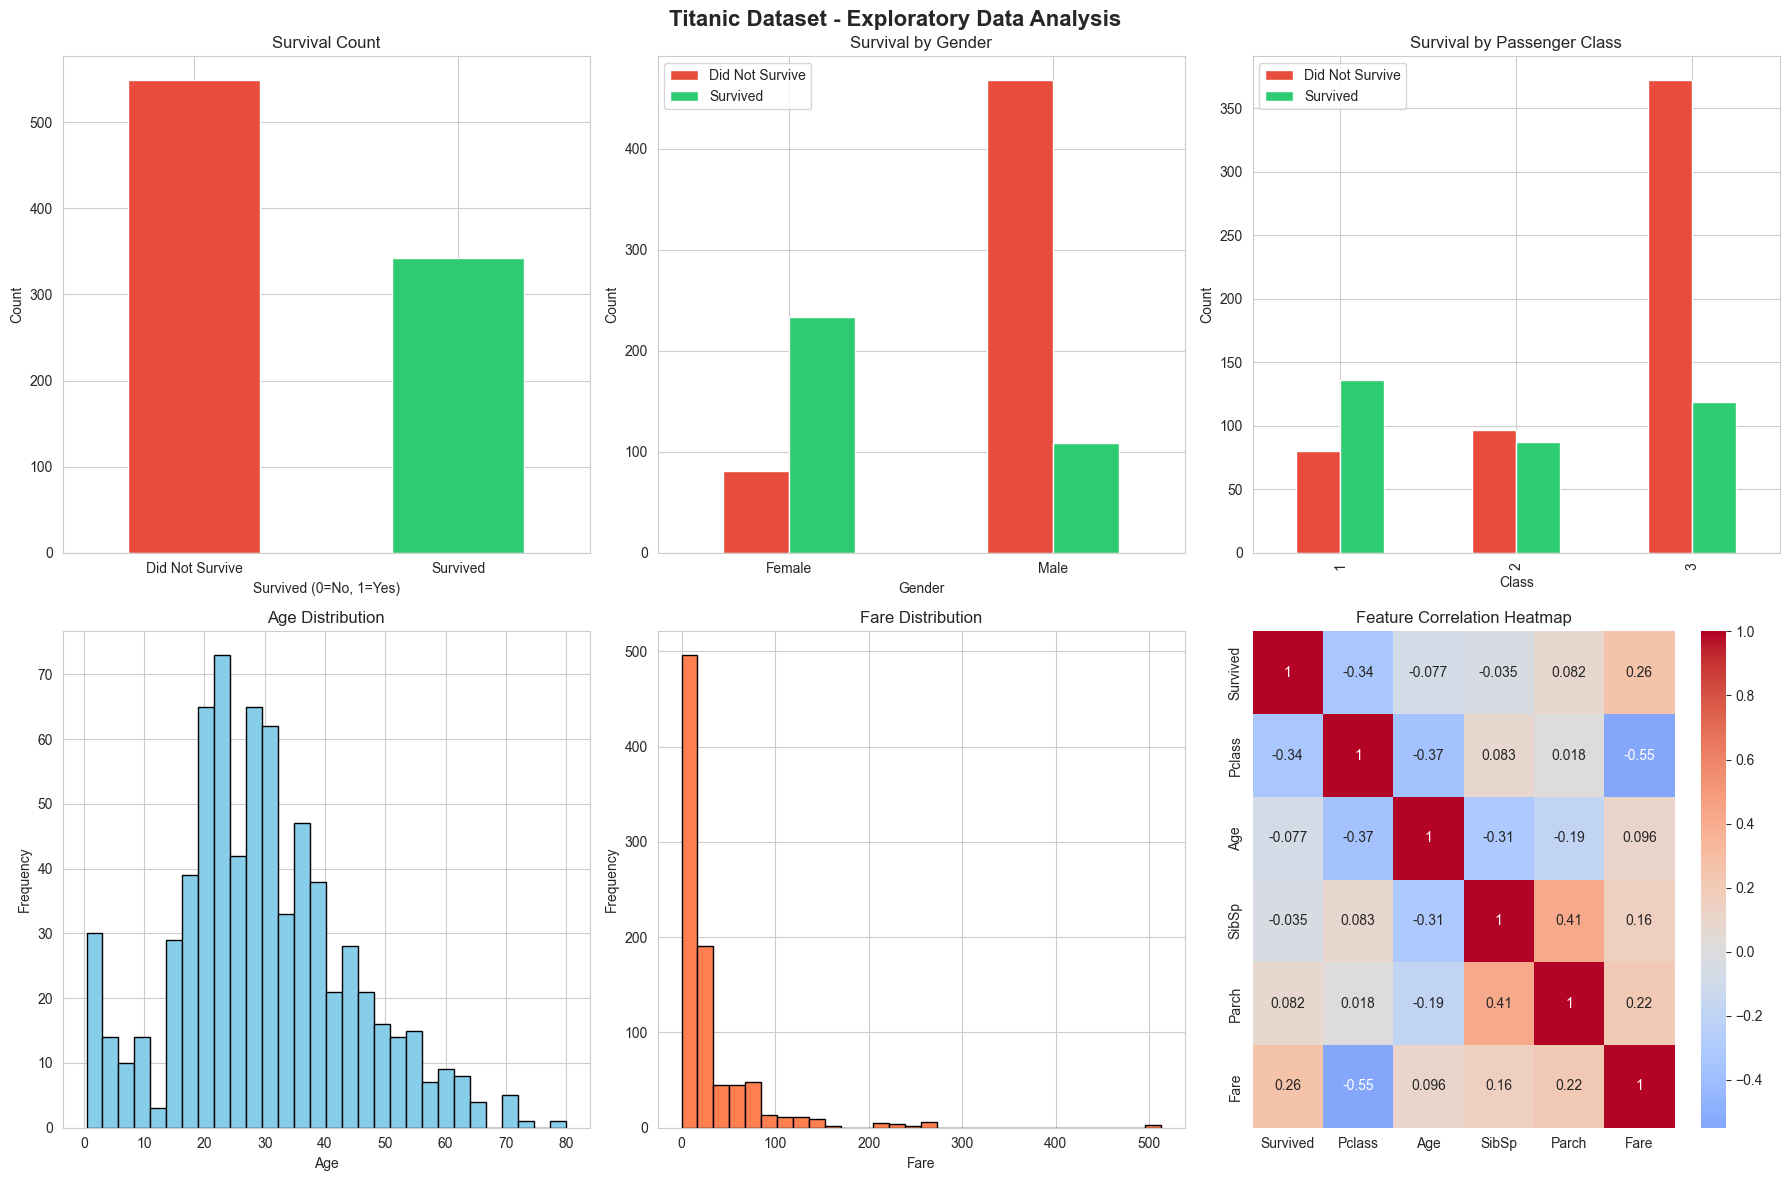


[STEP 4] DATA PREPROCESSING
----------------------------------------------------------------------
✓ Dropped columns: ['PassengerId', 'Name', 'Ticket', 'Cabin']

🔧 Handling missing values:
  ✓ Age: Filled with median (28.0)
  ✓ Embarked: Filled with mode ('S')

🔤 Encoding categorical variables:
  ✓ Sex: male=0, female=1
  ✓ Embarked: S=0, C=1, Q=2

✓ Final preprocessed shape: (891, 8)
✓ No missing values: True

[STEP 5] PREPARING TRAIN-TEST SPLIT
----------------------------------------------------------------------
Features (X): (891, 7)
Target (y): (891,)
Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

✓ Training samples: 712
✓ Test samples: 179

[STEP 6] TRAINING MACHINE LEARNING MODELS
----------------------------------------------------------------------

🤖 Training Logistic Regression...
  Train Accuracy: 80.48%
  Test Accuracy: 80.45%
  Cross-Val Score: 79.64%

🤖 Training Decision Tree...
  Train Accuracy: 86.52%
  Test Accuracy: 78.21%
  Cross-Val Sco

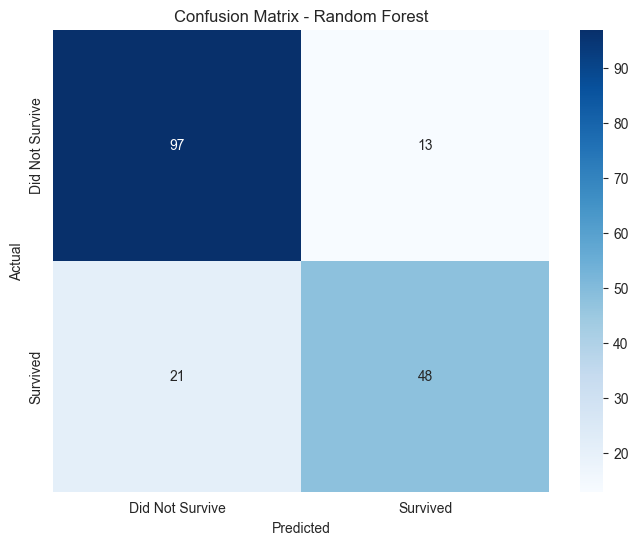


[STEP 8] FEATURE IMPORTANCE ANALYSIS
----------------------------------------------------------------------

  Feature  Importance
     Sex    0.300449
    Fare    0.247634
     Age    0.210925
  Pclass    0.105046
   SibSp    0.053854
   Parch    0.044826
Embarked    0.037266

✓ Feature importance saved: visualizations/feature_importance.png


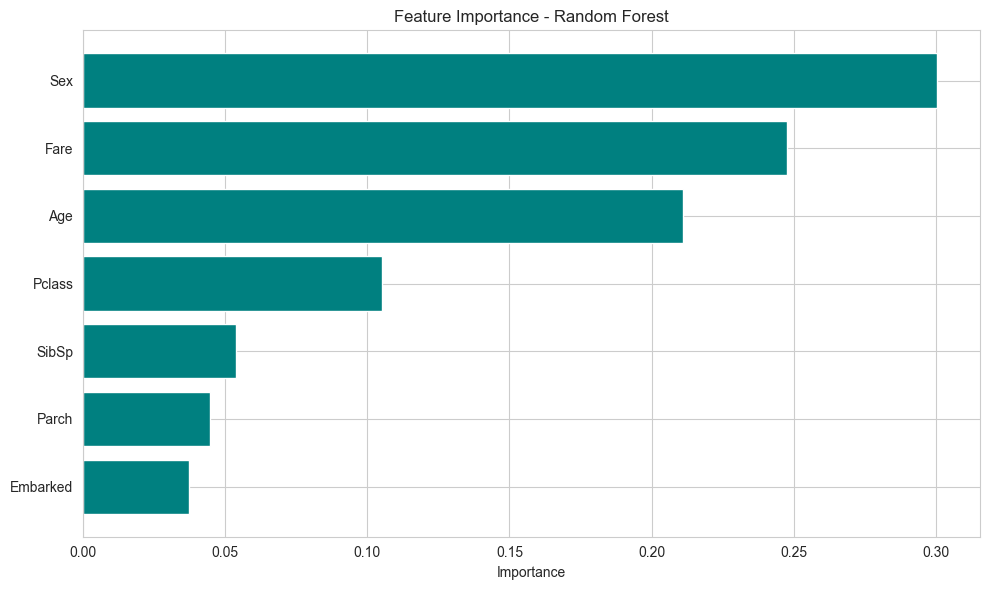


[STEP 9] SAVING THE MODEL
----------------------------------------------------------------------
✓ Model saved: models/titanic_model.pkl
  Model type: Random Forest
  Accuracy: 81.01%

[STEP 10] EXAMPLE PREDICTIONS ON NEW PASSENGERS
----------------------------------------------------------------------

Predicting survival for sample passengers:

Passenger 1: First class female, age 29, alone, high fare
  Prediction: SURVIVED ✓
  Confidence: 95.2%

Passenger 2: Third class male, age 25, with family, low fare
  Prediction: DID NOT SURVIVE ✗
  Confidence: 82.3%

Passenger 3: Second class female, age 35, with spouse and child
  Prediction: SURVIVED ✓
  Confidence: 94.1%

PROJECT SUMMARY & KEY INSIGHTS

📊 Dataset:
  • Total passengers: 891
  • Overall survival rate: 38.4%

🤖 Model Performance:
  • Best Model: Random Forest
  • Test Accuracy: 81.01%

📈 All Models:
  • Logistic Regression: 80.45%
  • Decision Tree: 78.21%
  • Random Forest: 81.01%

💡 Key Findings:
  • Women survival rate: 7

In [ ]:
# TITANIC SURVIVAL PREDICTION - COMPLETE ANALYSIS
# Data Science Internship - Task 1

import pandas as pd
import numpy as np
import kagglehub
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Create output folders RIGHT AT THE START
os.makedirs('visualizations', exist_ok=True)
os.makedirs('models', exist_ok=True)
print("✓ Created output directories: visualizations/ and models/")

print("\n" + "="*70)
print("TITANIC SURVIVAL PREDICTION")
print("="*70)

# ============================================
# STEP 1: DATA LOADING
# ============================================

print("\n[STEP 1] LOADING DATASET")
print("-"*70)

path = kagglehub.dataset_download("tedllh/titanic-train")
print(f"Dataset downloaded to: {path}")

files = os.listdir(path)
csv_files = [f for f in files if f.endswith('.csv')]

if len(csv_files) > 0:
    csv_filename = csv_files[0]
    df = pd.read_csv(os.path.join(path, csv_filename))
    print(f"✓ Loaded: {csv_filename}")
    print(f"✓ Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
else:
    raise FileNotFoundError("No CSV files found")

# ============================================
# STEP 2: EXPLORATORY DATA ANALYSIS
# ============================================

print("\n" + "="*70)
print("[STEP 2] EXPLORATORY DATA ANALYSIS")
print("-"*70)

print("\n📊 First 10 rows:")
print(df.head(10))

print("\n❓ Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Survival Statistics
print("\n⚓ SURVIVAL STATISTICS:")
print("-"*70)
survival_counts = df['Survived'].value_counts()
print(f"Total Passengers: {len(df)}")
print(f"Survived: {survival_counts[1]} ({survival_counts[1]/len(df)*100:.1f}%)")
print(f"Did Not Survive: {survival_counts[0]} ({survival_counts[0]/len(df)*100:.1f}%)")

# Survival by Gender
print("\n👥 Survival by Gender:")
gender_survival = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
print(gender_survival.round(2))

# Survival by Class
print("\n🎫 Survival by Passenger Class:")
class_survival = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
print(class_survival.round(2))

# ============================================
# STEP 3: DATA VISUALIZATION
# ============================================

print("\n" + "="*70)
print("[STEP 3] DATA VISUALIZATION")
print("-"*70)
print("Generating visualizations...")

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Survival Count
survival_counts.plot(kind='bar', ax=axes[0,0], color=['#e74c3c', '#2ecc71'])
axes[0,0].set_title('Survival Count')
axes[0,0].set_xlabel('Survived (0=No, 1=Yes)')
axes[0,0].set_ylabel('Count')
axes[0,0].set_xticklabels(['Did Not Survive', 'Survived'], rotation=0)

# 2. Survival by Gender
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', ax=axes[0,1], color=['#e74c3c', '#2ecc71'])
axes[0,1].set_title('Survival by Gender')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(['Did Not Survive', 'Survived'])
axes[0,1].set_xticklabels(['Female', 'Male'], rotation=0)

# 3. Survival by Class
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', ax=axes[0,2], color=['#e74c3c', '#2ecc71'])
axes[0,2].set_title('Survival by Passenger Class')
axes[0,2].set_xlabel('Class')
axes[0,2].set_ylabel('Count')
axes[0,2].legend(['Did Not Survive', 'Survived'])

# 4. Age Distribution
df['Age'].hist(bins=30, ax=axes[1,0], color='skyblue', edgecolor='black')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

# 5. Fare Distribution
df['Fare'].hist(bins=30, ax=axes[1,1], color='coral', edgecolor='black')
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')

# 6. Correlation Heatmap
numeric_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(numeric_df, annot=True, cmap='coolwarm', center=0, ax=axes[1,2])
axes[1,2].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.savefig('visualizations/titanic_eda.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved: visualizations/titanic_eda.png")
plt.show()

# ============================================
# STEP 4: DATA PREPROCESSING
# ============================================

print("\n" + "="*70)
print("[STEP 4] DATA PREPROCESSING")
print("-"*70)

data = df.copy()

# Drop columns
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_drops = [col for col in drop_cols if col in data.columns]
data.drop(existing_drops, axis=1, inplace=True)
print(f"✓ Dropped columns: {existing_drops}")

# Handle missing values
print("\n🔧 Handling missing values:")
if 'Age' in data.columns:
    age_median = data['Age'].median()
    data['Age'].fillna(age_median, inplace=True)
    print(f"  ✓ Age: Filled with median ({age_median:.1f})")

if 'Embarked' in data.columns:
    embarked_mode = data['Embarked'].mode()[0]
    data['Embarked'].fillna(embarked_mode, inplace=True)
    print(f"  ✓ Embarked: Filled with mode ('{embarked_mode}')")

if 'Fare' in data.columns and data['Fare'].isnull().sum() > 0:
    fare_median = data['Fare'].median()
    data['Fare'].fillna(fare_median, inplace=True)
    print(f"  ✓ Fare: Filled with median ({fare_median:.2f})")

# Encode categorical variables
print("\n🔤 Encoding categorical variables:")
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
print("  ✓ Sex: male=0, female=1")

data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print("  ✓ Embarked: S=0, C=1, Q=2")

print(f"\n✓ Final preprocessed shape: {data.shape}")
print(f"✓ No missing values: {data.isnull().sum().sum() == 0}")

# ============================================
# STEP 5: TRAIN-TEST SPLIT
# ============================================

print("\n" + "="*70)
print("[STEP 5] PREPARING TRAIN-TEST SPLIT")
print("-"*70)

X = data.drop('Survived', axis=1)
y = data['Survived']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Features: {list(X.columns)}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Training samples: {len(X_train)}")
print(f"✓ Test samples: {len(X_test)}")

# ============================================
# STEP 6: MODEL TRAINING
# ============================================

print("\n" + "="*70)
print("[STEP 6] TRAINING MACHINE LEARNING MODELS")
print("-"*70)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
}

results = {}

for name, model in models.items():
    print(f"\n🤖 Training {name}...")
    
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    results[name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'cv_score': cv_scores.mean(),
        'predictions': test_pred
    }
    
    print(f"  Train Accuracy: {train_acc*100:.2f}%")
    print(f"  Test Accuracy: {test_acc*100:.2f}%")
    print(f"  Cross-Val Score: {cv_scores.mean()*100:.2f}%")

# Select best model
best_model_name = max(results, key=lambda x: results[x]['test_acc'])
best_result = results[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_result['test_acc']*100:.2f}%")

# ============================================
# STEP 7: MODEL EVALUATION
# ============================================

print("\n" + "="*70)
print("[STEP 7] DETAILED MODEL EVALUATION")
print("-"*70)

print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {best_result['test_acc']*100:.2f}%\n")

print("CLASSIFICATION REPORT:")
print("-"*70)
print(classification_report(y_test, best_result['predictions'], 
                          target_names=['Did Not Survive', 'Survived']))

print("\nCONFUSION MATRIX:")
print("-"*70)
cm = confusion_matrix(y_test, best_result['predictions'])
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('visualizations/confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Confusion matrix saved: visualizations/confusion_matrix.png")
plt.show()

# ============================================
# STEP 8: FEATURE IMPORTANCE
# ============================================

if best_model_name in ['Random Forest', 'Decision Tree']:
    print("\n" + "="*70)
    print("[STEP 8] FEATURE IMPORTANCE ANALYSIS")
    print("-"*70)
    
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_result['model'].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\n", feature_imp.to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_imp['Feature'], feature_imp['Importance'], color='teal')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('visualizations/feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Feature importance saved: visualizations/feature_importance.png")
    plt.show()

# ============================================
# STEP 9: SAVE THE MODEL
# ============================================

print("\n" + "="*70)
print("[STEP 9] SAVING THE MODEL")
print("-"*70)

model_path = 'models/titanic_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_result['model'], f)

print(f"✓ Model saved: {model_path}")
print(f"  Model type: {best_model_name}")
print(f"  Accuracy: {best_result['test_acc']*100:.2f}%")

# ============================================
# STEP 10: EXAMPLE PREDICTIONS
# ============================================

print("\n" + "="*70)
print("[STEP 10] EXAMPLE PREDICTIONS ON NEW PASSENGERS")
print("-"*70)

examples = [
    {'Pclass': 1, 'Sex': 1, 'Age': 29, 'SibSp': 0, 'Parch': 0, 'Fare': 100, 'Embarked': 0},
    {'Pclass': 3, 'Sex': 0, 'Age': 25, 'SibSp': 1, 'Parch': 2, 'Fare': 15, 'Embarked': 0},
    {'Pclass': 2, 'Sex': 1, 'Age': 35, 'SibSp': 1, 'Parch': 1, 'Fare': 50, 'Embarked': 1},
]

descriptions = [
    "First class female, age 29, alone, high fare",
    "Third class male, age 25, with family, low fare",
    "Second class female, age 35, with spouse and child"
]

print("\nPredicting survival for sample passengers:\n")

for i, (example, desc) in enumerate(zip(examples, descriptions), 1):
    sample_df = pd.DataFrame([example])
    prediction = best_result['model'].predict(sample_df)[0]
    probability = best_result['model'].predict_proba(sample_df)[0]
    
    print(f"Passenger {i}: {desc}")
    print(f"  Prediction: {'SURVIVED ✓' if prediction == 1 else 'DID NOT SURVIVE ✗'}")
    print(f"  Confidence: {max(probability)*100:.1f}%")
    print()

# ============================================
# FINAL SUMMARY
# ============================================

print("="*70)
print("PROJECT SUMMARY & KEY INSIGHTS")
print("="*70)

print(f"\n📊 Dataset:")
print(f"  • Total passengers: {len(df)}")
print(f"  • Overall survival rate: {df['Survived'].mean()*100:.1f}%")

print(f"\n🤖 Model Performance:")
print(f"  • Best Model: {best_model_name}")
print(f"  • Test Accuracy: {best_result['test_acc']*100:.2f}%")

print("\n📈 All Models:")
for name, res in results.items():
    print(f"  • {name}: {res['test_acc']*100:.2f}%")

print("\n💡 Key Findings:")
print(f"  • Women survival rate: {gender_survival.loc['female', 1]:.1f}%")
print(f"  • Men survival rate: {gender_survival.loc['male', 1]:.1f}%")
print(f"  • 1st class survival: {class_survival.loc[1, 1]:.1f}%")
print(f"  • 3rd class survival: {class_survival.loc[3, 1]:.1f}%")

print("\n📁 Generated Files:")
print("  ✓ visualizations/titanic_eda.png")
print("  ✓ visualizations/confusion_matrix.png")
if best_model_name in ['Random Forest', 'Decision Tree']:
    print("  ✓ visualizations/feature_importance.png")
print("  ✓ models/titanic_model.pkl")

print("\n" + "="*70)
print("="*70)